In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
read_path='/media/taufiq/Data/heart_sound/Heart_Sound/codes/logs/results.csv'
df = pd.read_csv(read_path)

In [3]:
df['folds']=df.Filename.map(lambda x: x.split(' ')[0])
df.head()

,Filename,Weight Initialization,Activation,Class weights,Kernel Size,Max Norm,Dropout -filters,Dropout - dense,L2 - filters,L2- dense,...,Best Val Acc Per Cardiac Cycle,Epoch,Training Acc per cardiac cycle,Sensitivity,Specificity,Macc,No of Abnormal Strongly Mislabeled,No of Normal Strongly Mislabeled,Comments,folds
0,fold0 2017-12-06 15:22:11,zero,relu-sigmoid,NaN,5,NaN,NaN,0.25,NaN,0.01,...,68.12,68.0,86.68,NaN,NaN,NaN,NaN,NaN,NaN Error,fold0
1,fold1 2017-12-06 16:54:16,zero,relu-sigmoid,NaN,5,NaN,NaN,0.25,NaN,0.01,...,69.06,46.0,84.88,NaN,NaN,NaN,NaN,NaN,NaN Error,fold1
2,fold2 2017-12-06 18:05:33.552753,zero,relu-sigmoid,NaN,5,NaN,NaN,0.25,NaN,0.01,...,78.19,29.0,84.48,NaN,NaN,NaN,NaN,NaN,NAN Error,fold2
3,fold3 2017-12-08 16:06:20.506795,zero,relu-sigmoid,NaN,5,NaN,NaN,0.25,NaN,0.01,...,79.92,21.0,87.28,NaN,NaN,NaN,NaN,NaN,"Stooping low, possible NaN error",fold3
4,fold0 2017-12-11 09:55:04.403236,he_normal,relu-sigmoid,NaN,5,4.0,NaN,0.25,NaN,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Underfittin, need to increase learning rate",fold0


In [4]:
mask=df.folds.str.contains('fold2_noFIR')
mask.tail()

68    True
69    True
70    True
71    True
72    True
Name: folds, dtype: bool

In [5]:
df = df.sort_values('Learning Rate')

In [6]:
lr = df['Learning Rate'][mask].values
vac = df['Best Val Acc Per Cardiac Cycle'][mask].values/100

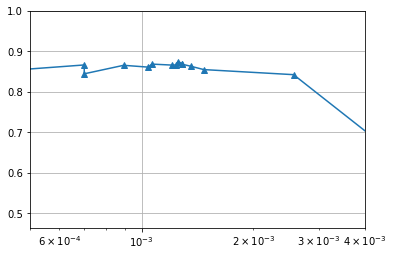

In [22]:
plt.plot(lr,vac,marker='^')
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(5E-4,4E-3)
plt.ylim(min(vac),1)
plt.xscale('log',nonposy='clip')
plt.grid()
plt.show()